# Visualization with Altair
[Altair](https://altair-viz.github.io) is *declarative*  visualization library for Python and based on [Vega-Lite](https://vega.github.io/vega-lite/).

Declartive means that - in Altair - you specify what you want the visualization to use, i.e.,
* Which attribute gets mapped to x and y.
* Color the marks by a one attribute and set vary its size based on another, etc.

So the key idea is that you link attributes to visual encoding channels.

The first step to create an Altair visualization is to specify a [mark type](https://altair-viz.github.io/user_guide/marks.html).
Altair comes with `point`, `line`, `bar`, `area`, `geoshape`, and more.

Then you are able to [encode](https://altair-viz.github.io/user_guide/encoding.html) `position`, `color`, `shape`, and `size` based on your data.

In [1]:
# See https://github.com/plotly/plotly.py and https://plot.ly/python/figurewidget/
import altair as alt

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

import pandas as pd
import numpy as np

In [2]:
alt.__version__

'3.2.0'

In [3]:
#use a standard dataset of heterogenous data
from vega_datasets import data
#cars = pd.read_csv('data/mtcars.csv')
cars = data.cars() # more cars + categorical columns
cars.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
405,chevy s-10,31.0,4,119.0,82.0,2720,19.4,1982-01-01,USA


## Scatterplot

In [4]:
alt.Chart(cars).mark_point() # 406 cars -> 406 points

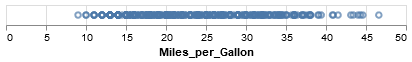

In [5]:
alt.Chart(cars).mark_point().encode(x='Miles_per_Gallon')

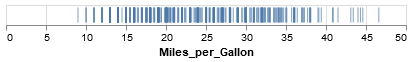

In [6]:
alt.Chart(cars).mark_tick().encode(x='Miles_per_Gallon')

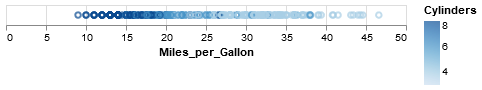

In [7]:
alt.Chart(cars).mark_point().encode(x='Miles_per_Gallon', color='Cylinders')

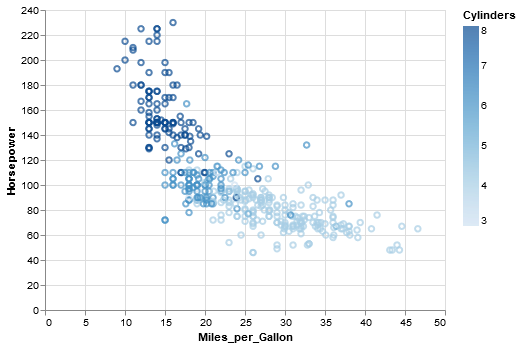

In [8]:
# We use a point as mark
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders' # O=Ordinal, N=Nominal, Q=Quantitative; see https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types
)

In [9]:
# But some other marks work just as well (or a little less 😉 ).
import ipywidgets as widgets

baseChart = alt.Chart(cars);

# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Selection-widgets
@widgets.interact(mark_type = widgets.Dropdown(
    options = [('point', baseChart.mark_point()), # key value pairs to pass a function to the function
                 ('circle', baseChart.mark_circle()), 
                 ('square', baseChart.mark_square()), 
                 ('tick', baseChart.mark_tick()), 
                 ('line', baseChart.mark_line())],
    description = 'Mark Type:'))
def show_plot(mark_type):
    # You have to return the chart to make it visible.
    return mark_type.encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders:N'
)   


interactive(children=(Dropdown(description='Mark Type:', options=(('point', alt.Chart(...)), ('circle', alt.Ch…

### Faceting

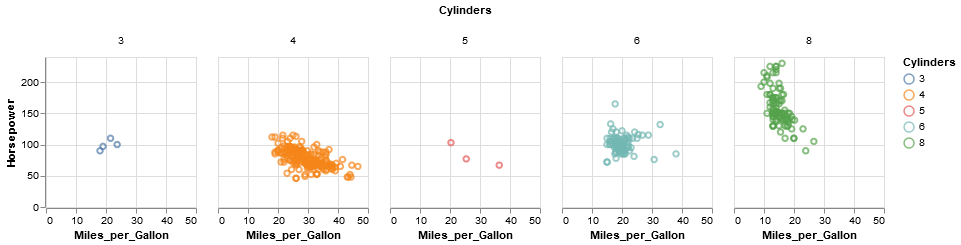

In [10]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders:N',
    column='Cylinders'
).properties(
    width=150, # per plot; see https://altair-viz.github.io/user_guide/configuration.html#view-configuration
    height=150
)

### Tooltips

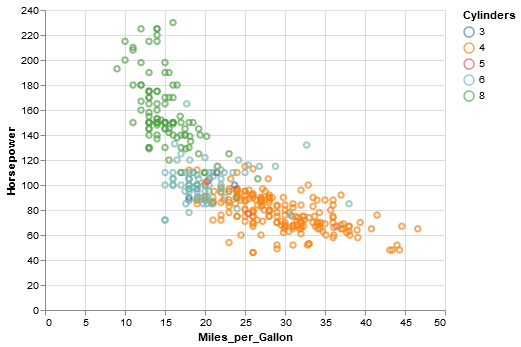

In [11]:
# We use a point as mark
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders:N',
    tooltip=['Name', 'Origin']
)

## Gapminder Example

In [12]:
gap = pd.read_csv('data/gapminder-unfiltered.tsv', sep='\t')
gap2007 = gap[gap.year == 2007]

In [13]:
#Matplotlib
#for each group create an own plot an overlay them
#pop_max = gap2007['pop'].max()
#for (name, group),color in zip(gap2007.groupby('continent'),colors):
#    plt.scatter(x=group['lifeExp'],y=group['gdpPercap'],label=name, c=color,s=(group['pop']/pop_max)*400)
#plt.yscale('log')
#plt.title('Life Expectancy vs GDP')
#plt.xlabel('Life Expectancy')
#plt.ylabel('GDP Per Cap')
#plt.legend()

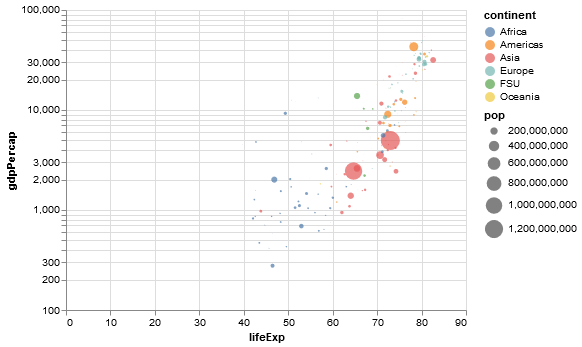

In [14]:
alt.Chart(gap2007).mark_circle().encode(
    x='lifeExp',
    y=alt.Y('gdpPercap',  scale=alt.Scale(type='log')),
    color='continent',
    size='pop',
    tooltip='country'
)

## Interactivity 
### Zoom & Pan

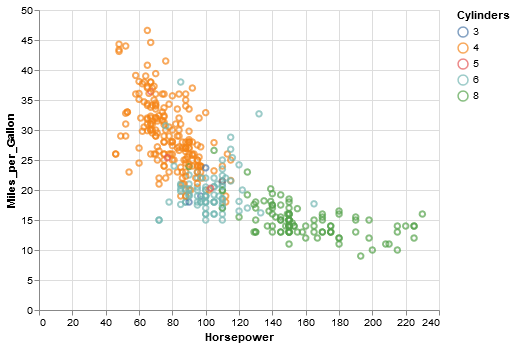

In [15]:
vis = alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Cylinders:N'
)

# Simple
vis.interactive()

# Verbose
#selection = alt.selection_interval(bind='scales') # selection of type "interval", bound to the scales
#vis.add_selection(
#    selection # bind this selection to our chart
#)

### Brushing

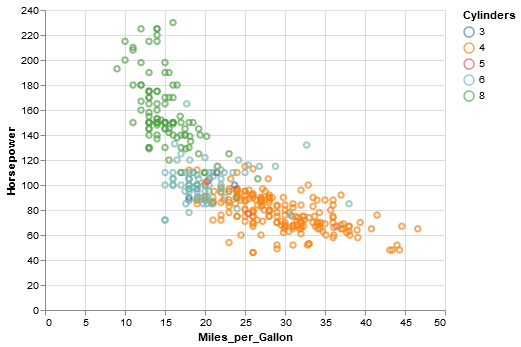

In [16]:
brush = alt.selection_interval()  # selection of type "interval"

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(brush, 'Cylinders:N', alt.value('lightgray')) # unselected become lightgrey
).add_selection(
    brush  # bind this brush to our chart
)

### Linking

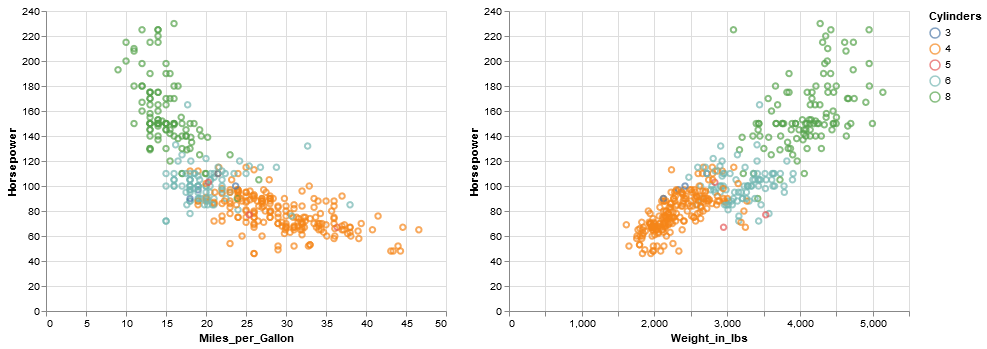

In [18]:
brush = alt.selection_interval(encodings=['x']) # Only seelct on x-axis

chart = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(brush, 'Cylinders:N', alt.value('lightgray'))
).add_selection(
    brush
)

# Link horizontal
chart.encode(x='Miles_per_Gallon') | chart.encode(x='Weight_in_lbs') #two charts combined with a vertical bar '|'

In [ ]:
# Link vertical
